In [10]:
import json
from pydub import AudioSegment
import csv
import pandas as pd
import librosa
import librosa.display
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import codecs
import sklearn

###
File Name: state of the union 2018
###


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


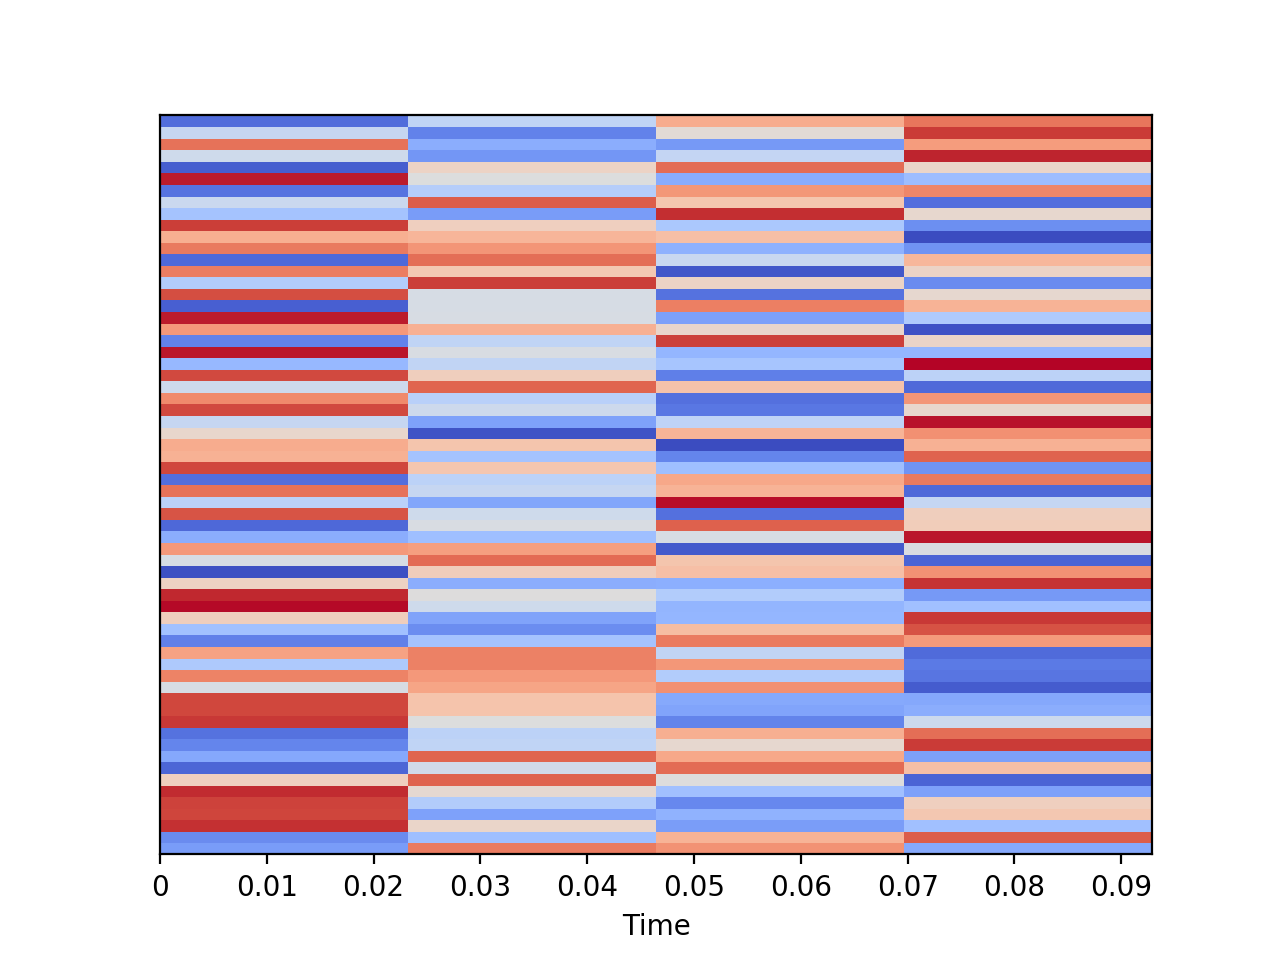

(64, 4)
File 0: DONE
CSV SAVED 





In [13]:
filenames = ["state of the union 2018"]
for f in filenames:
    print("###")
    print("File Name: "+f)
    print("###")
    data = json.load(codecs.open("./dataset/"+f+".json", 'r', 'utf-8-sig'))
    lst = data["words"]
    data_file = pd.DataFrame(columns=["Number","Word"])
    for num,item in enumerate(lst):
        t1 = float(item['startTime']) * 1000 #Works in milliseconds
        t2 = float(item['endTime']) * 1000
        newAudio = AudioSegment.from_mp3("./dataset/"+f+".mp3")
        newAudio = newAudio[t1:t2]
        newAudio.export("./dataset/"+f+"/sample.wav", format="wav")
        x_2b, sr_2b = librosa.load("./dataset/"+f+"/sample.wav")
#         spec_2b = librosa.amplitude_to_db(np.abs(librosa.stft(x_2b)), ref=np.max)
        mfccs = librosa.feature.mfcc(x_2b, sr=sr_2b, n_mfcc=64)
        mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
        librosa.display.specshow(mfccs, sr=sr_2b, x_axis='time')
        print(mfccs.shape)
#         newAudio.export("./dataset/"+f+"/"+str(num)+".mp3", format="mp3")
        row = [str(num), str(item['value'])]
#         data_file = pd.read_csv("./dataset/"+f+".csv")
        data_file = data_file.append({'Number' : str(num) , 'Word' : str(item['value'])} , ignore_index=True)
        print("File "+str(num)+": DONE")
        if num == 0:
            break
#     data_file.to_csv("./dataset/"+f+".csv",index = False)
    print("CSV SAVED \n\n\n")

In [3]:
filenames = [
    "state of the union 2018",
    "state-of-the-union-trump_2019-02-05-225820-8225-0-0-0.64kmono",
    "Trump_WEF_2018",
    "Trumps_speech_at_75th_d_day_anniversary_in_normandy_full_remarks_UhOMVlQxapY"
]
for f in filenames:
    print("###")
    print("File Name: "+f)
    print("###")
    data = json.load(codecs.open("./dataset1/"+f+".json", 'r', 'utf-8-sig'))
    lst = data["words"]
    words = []
    for num,item in enumerate(lst):
        words.append(item['value'])
    text = ' '.join(words)
    count = 0
    for i in text: 
        if i == '.': 
            count = count + 1
    print("Number of words : "+str(len(words)))
    print("Number of sentences : "+str(count))

###
File Name: state of the union 2018
###
Number of words : 6101
Number of sentences : 362
###
File Name: state-of-the-union-trump_2019-02-05-225820-8225-0-0-0.64kmono
###
Number of words : 5815
Number of sentences : 306
###
File Name: Trump_WEF_2018
###
Number of words : 3911
Number of sentences : 208
###
File Name: Trumps_speech_at_75th_d_day_anniversary_in_normandy_full_remarks_UhOMVlQxapY
###
Number of words : 2329
Number of sentences : 142
